In [1]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# Acquire

In [2]:
#reading the list of videos contained in the csv file
#df = pd.read_csv('vidz.csv')
df = pd.read_pickle('prepared.pkl 2')
df.age = (df.age.dt.days * 24) + (df.age.dt.seconds/3600)
#df.head()

In [3]:
# ".describe()" shows the basic statistical description for each 
#column that is calculable
df.describe()

,view_count,likes,comment_count,duration,rank,top_25,age,engagement,sponsored,num_of_tags,title_in_description,title_in_tags,pct_tags_in_description
count,9.536000e+03,9.536000e+03,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.0,9536.000000
mean,1.779124e+06,9.925498e+04,6683.649958,1820.269820,98.176174,0.128461,102.612389,0.065251,0.036808,16.321204,0.121959,0.0,0.147613
std,4.587557e+06,3.483588e+05,35350.140816,4504.838662,56.767043,0.334619,82.934613,0.048237,0.188300,13.563358,0.327255,0.0,0.180294
min,2.398700e+04,0.000000e+00,0.000000,60.000000,1.000000,0.000000,-9.007222,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
25%,2.516395e+05,8.224250e+03,447.750000,258.000000,49.000000,0.000000,43.011667,0.026920,0.000000,5.000000,0.000000,0.0,0.000000
50%,6.102620e+05,2.167200e+04,1265.000000,752.000000,98.000000,0.000000,85.998333,0.056084,0.000000,14.000000,0.000000,0.0,0.083333
75%,1.469658e+06,6.241200e+04,3203.750000,1335.000000,146.000000,0.000000,131.181111,0.087857,0.000000,24.000000,0.000000,0.0,0.230769
max,9.585492e+07,4.383754e+06,506826.000000,39938.000000,200.000000,1.000000,713.496667,0.416443,1.000000,119.000000,1.000000,0.0,1.000000


In [4]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'description', 'duration', 'captions', 'region', 'rank', 'top_25',
       'age', 'engagement', 'sponsored', 'num_of_tags', 'word_bank',
       'cleaned_tags', 'cleaned_desc', 'title_in_description', 'title_in_tags',
       'pct_tags_in_description'],
      dtype='object')

In [5]:
#check data type
df.dtypes

video_id                                object
title                                   object
publishedAt                datetime64[ns, UTC]
channelTitle                            object
categoryId                              object
trending_date              datetime64[ns, UTC]
tags                                    object
view_count                               int64
likes                                    int64
comment_count                            int64
thumbnail_link                          object
comments_disabled                         bool
ratings_disabled                          bool
description                             object
duration                                 int64
captions                                  bool
region                                  object
rank                                     int64
top_25                                   int64
age                                    float64
engagement                             float64
sponsored    

In [6]:
#check 
# ".head" after the data name shows 5 rows of the uploaded dataset
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,age,engagement,sponsored,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,82.554444,0.020506,0,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{슈화, 미연, Nxde직캠 Node, 우기, 누드, 아이들아는형님, 아이들, 민니...","{[, 8시, 하이라이트, https://tving.onelink.me/xHqC/1...",0,0,0.013889
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31 16:00:16+00:00,GQ,Entertainment,2022-11-02 00:00:00+00:00,(방탄소년단) (방탄소년단) gq 10 essentials 10 essentials...,1670293,231953,6345,...,31.995556,0.154065,0,35,"[There, are, few, things, Jin, 진, of, BTS, ca,...","{luxury, jin jin, 방탄소년단, list, without, n't, m...","{ABOUT, Stream, Welcome, single, Join, phone, ...",0,0,0.371429
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29 09:30:05+00:00,KBS 한국방송,Entertainment,2022-11-02 00:00:00+00:00,KBS 한국방송공사 mylovekbs 예고 티저 김나영 붐 나영 수홍 박수홍엄마 유...,841292,12902,1378,...,86.498611,0.021888,0,26,"[박수홍, 신혼집, 대공개, ❤, 애정, 가득한, 인테리어에, 깨소금, 냄새!!0:...","{대접요리, 수홍, 편스, 붐 나영, 신혼집, 이찬원축가, 방게, 박수홍엄마, 간단...","{지인분들의, 출연을, 깨소금, 박수홍, 인테리어에, 아내, 식재료, 신혼집, 애정...",0,0,0.111111
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30998614,4340713,501383,...,115.999722,0.204727,0,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{HYBE HYBE, 하이브레이블즈, 하이브, LABELS, HYBE}","{OFFICE, MendozaOffice, Dylan Sutherland, Deco...",1,0,0.000000
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31 11:15:01+00:00,승우아빠,Entertainment,2022-11-02 00:00:00+00:00,승우아빠 키친마이야르 시즌3메뉴 신메뉴 키친마이야르 신메뉴 솔의눈 솔의눈 슬러시 키...,343269,5389,581,...,36.749722,0.022469,0,11,"[승우아빠, 키친마이야르, #, 시즌3오늘은, 키친마이야르, 시즌3의, 신, 메뉴,...","{신메뉴, 내꺼내먹, 솔의눈, 승우아빠, 슬러시, 시즌3메뉴, 키친마이야르}","{시즌3의, ️, https://www.twitch.tv/swab85✔️, ✔, 승...",0,0,0.285714


## Prepare

## Convert to datetime --> ppublised at, trending date, duration (timedelta)

In [7]:
df.age.sort_values().head(10)

3     -9.007222
1     -8.000278
160   -6.067778
162   -6.067778
12    -6.003056
4     -6.003056
0     -5.521944
0     -5.521944
54    -5.502500
54    -5.502500
Name: age, dtype: float64

In [8]:
df.engagement

0      0.020506
1      0.154065
2      0.021888
3      0.204727
4      0.022469
         ...   
155    0.015714
156    0.037060
157    0.082704
158    0.066036
159    0.064973
Name: engagement, Length: 9536, dtype: float64

In [9]:
#Imports spacy
import spacy

In [10]:
#creates the nlp object that is going to do the heavy lifting
nlp = spacy.load("en_core_web_sm")

## Think about combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


## We can target placing videos in/out of the top 25 


In [11]:
#create rank and top 25 categories

In [12]:
df.top_25

0      1
1      1
2      1
3      1
4      1
      ..
155    0
156    0
157    0
158    0
159    0
Name: top_25, Length: 9536, dtype: int64

## Convert Duration

In [13]:
df.duration.head(20)

0     1281
1      489
2      788
3      320
4      989
5      675
6      946
7      341
8      663
9      721
10     563
11     519
12     564
13    2001
14    1147
15    1139
16     208
17     863
18     729
19    1206
Name: duration, dtype: int64

In [14]:
df['duration']

0      1281
1       489
2       788
3       320
4       989
       ... 
155    2758
156    1209
157     986
158     708
159     962
Name: duration, Length: 9536, dtype: int64

In [15]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,age,engagement,sponsored,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,82.554444,0.020506,0,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{슈화, 미연, Nxde직캠 Node, 우기, 누드, 아이들아는형님, 아이들, 민니...","{[, 8시, 하이라이트, https://tving.onelink.me/xHqC/1...",0,0,0.013889
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31 16:00:16+00:00,GQ,Entertainment,2022-11-02 00:00:00+00:00,(방탄소년단) (방탄소년단) gq 10 essentials 10 essentials...,1670293,231953,6345,...,31.995556,0.154065,0,35,"[There, are, few, things, Jin, 진, of, BTS, ca,...","{luxury, jin jin, 방탄소년단, list, without, n't, m...","{ABOUT, Stream, Welcome, single, Join, phone, ...",0,0,0.371429
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29 09:30:05+00:00,KBS 한국방송,Entertainment,2022-11-02 00:00:00+00:00,KBS 한국방송공사 mylovekbs 예고 티저 김나영 붐 나영 수홍 박수홍엄마 유...,841292,12902,1378,...,86.498611,0.021888,0,26,"[박수홍, 신혼집, 대공개, ❤, 애정, 가득한, 인테리어에, 깨소금, 냄새!!0:...","{대접요리, 수홍, 편스, 붐 나영, 신혼집, 이찬원축가, 방게, 박수홍엄마, 간단...","{지인분들의, 출연을, 깨소금, 박수홍, 인테리어에, 아내, 식재료, 신혼집, 애정...",0,0,0.111111
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30998614,4340713,501383,...,115.999722,0.204727,0,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{HYBE HYBE, 하이브레이블즈, 하이브, LABELS, HYBE}","{OFFICE, MendozaOffice, Dylan Sutherland, Deco...",1,0,0.000000
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31 11:15:01+00:00,승우아빠,Entertainment,2022-11-02 00:00:00+00:00,승우아빠 키친마이야르 시즌3메뉴 신메뉴 키친마이야르 신메뉴 솔의눈 솔의눈 슬러시 키...,343269,5389,581,...,36.749722,0.022469,0,11,"[승우아빠, 키친마이야르, #, 시즌3오늘은, 키친마이야르, 시즌3의, 신, 메뉴,...","{신메뉴, 내꺼내먹, 솔의눈, 승우아빠, 슬러시, 시즌3메뉴, 키친마이야르}","{시즌3의, ️, https://www.twitch.tv/swab85✔️, ✔, 승...",0,0,0.285714


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 159
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 9536 non-null   object             
 1   title                    9536 non-null   object             
 2   publishedAt              9536 non-null   datetime64[ns, UTC]
 3   channelTitle             9536 non-null   object             
 4   categoryId               9536 non-null   object             
 5   trending_date            9536 non-null   datetime64[ns, UTC]
 6   tags                     9536 non-null   object             
 7   view_count               9536 non-null   int64              
 8   likes                    9536 non-null   int64              
 9   comment_count            9536 non-null   int64              
 10  thumbnail_link           9536 non-null   object             
 11  comments_disabled        9536 n

In [17]:
df.isna().sum()

video_id                   0
title                      0
publishedAt                0
channelTitle               0
categoryId                 0
trending_date              0
tags                       0
view_count                 0
likes                      0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
description                0
duration                   0
captions                   0
region                     0
rank                       0
top_25                     0
age                        0
engagement                 0
sponsored                  0
num_of_tags                0
word_bank                  0
cleaned_tags               0
cleaned_desc               0
title_in_description       0
title_in_tags              0
pct_tags_in_description    0
dtype: int64

In [18]:
#Remove NA Values
df.dropna(inplace = True)

In [19]:
df.isna().sum()

video_id                   0
title                      0
publishedAt                0
channelTitle               0
categoryId                 0
trending_date              0
tags                       0
view_count                 0
likes                      0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
description                0
duration                   0
captions                   0
region                     0
rank                       0
top_25                     0
age                        0
engagement                 0
sponsored                  0
num_of_tags                0
word_bank                  0
cleaned_tags               0
cleaned_desc               0
title_in_description       0
title_in_tags              0
pct_tags_in_description    0
dtype: int64

# Exploration

In [20]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df

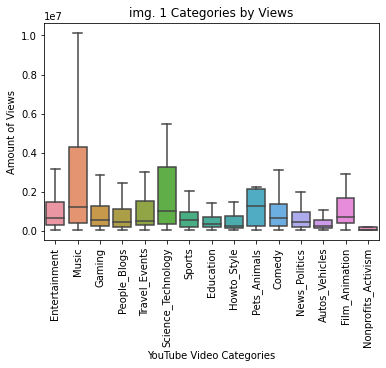

In [21]:
#This sets the box plot by the axes and dataframe :
sns.boxplot(x="categoryId", y="view_count", data= df, showfliers=False) .set(title="img. 1 Categories by Views") 
plt.xlabel("YouTube Video Categories")                 
plt.ylabel("Amount of Views")
plt.xticks(rotation= 90)
plt.show()

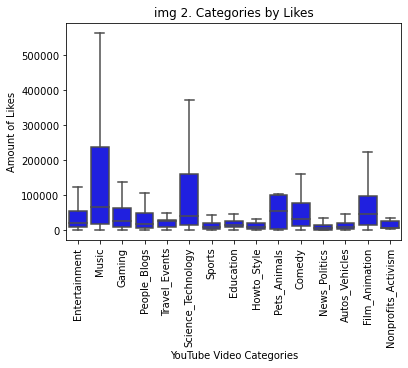

In [22]:
#Create a box plot showing the amount of likes for each category of videos
sns.boxplot(x="categoryId", y="likes", data= df, showfliers=False, color="blue") .set(title="img 2. Categories by Likes") 
plt.xlabel("YouTube Video Categories")              
plt.ylabel("Amount of Likes")
plt.xticks(rotation= 90)
plt.show()

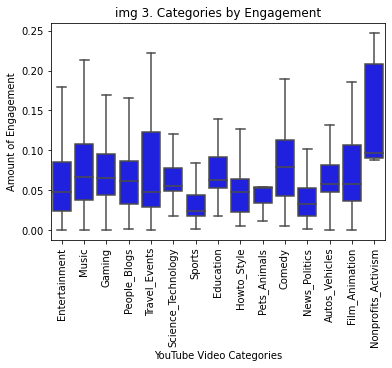

In [23]:
#Create a box plot showing the amount of dislikes for each category of videos
sns.boxplot(x="categoryId", y="engagement", data= df, showfliers=False, color="blue") .set(title="img 3. Categories by Engagement") 
plt.xlabel("YouTube Video Categories")                
plt.ylabel("Amount of Engagement")
plt.xticks(rotation= 90)
plt.show()

In [24]:
#sns.lineplot( data= yt, x="category_name", y="trending_date",hue="categoryId").set(title="Youtube Videos Categories") #THis sets the histogram by the axes and dataframe
#sns.lineplot(data= df, x="trending_date", y="view_count",hue="categoryId").set(title=" img 4. Youtube Videos Categories Trending date")
#plt.xlabel("Trending Date")                 
#plt.ylabel("Views")
#plt.show()

In [25]:
#Create a box plot showing the amount of sponsored for each category of videos
#sns.boxplot(x="categoryId", y="sponsored", data= df, showfliers=False, color="blue") .set(title="img 5. Categories by Sponsored") 
#plt.xlabel("YouTube Video Categories")                
#plt.ylabel("Amount of Sponsored")
#plt.xticks(rotation= 90)
#plt.show()

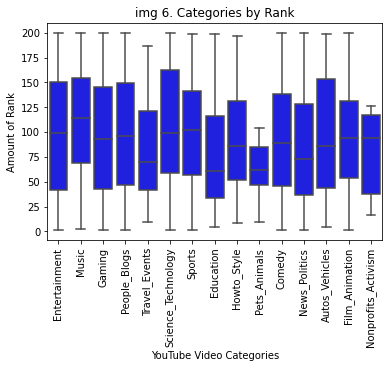

In [26]:
#Create a box plot showing the amount of sponsored for each category of videos
sns.boxplot(x="categoryId", y="rank", data= df, showfliers=False, color="blue") .set(title="img 6. Categories by Rank") 
plt.xlabel("YouTube Video Categories")                
plt.ylabel("Amount of Rank")
plt.xticks(rotation= 90)
plt.show()

In [27]:
#Create a box plot showing the amount of sponsored for each category of videos
#sns.boxplot(x="categoryId", y="duration", data= df, showfliers=False, color="blue") .set(title="img 7. Categories by Duration") 
#plt.xlabel("YouTube Video Categories")                
#plt.ylabel("Amount of Duration")
#plt.xticks(rotation= 90)
#plt.show()

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from textblob import TextBlob
from plotly.offline import iplot
#import emoji
import re
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [30]:
def basic_clean(article0):
    #lower cases
    if isinstance(article0, float):
        article = str(article0).lower()
    else:
        article = article0.lower()
    ## decodes to change to "normal" characters after encoding to ascii from a unicode normalize
    article = unicodedata.normalize("NFKD",article).encode("ascii","ignore").decode("utf-8")
    # removes anything not lowercase, number, single quote, or a space
    article = re.sub(r'[^a-z0-9\'\s]','',article)
    return article

In [31]:
def tokenize(article0):
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article0,return_str=True)
    return article


In [32]:
def stem(article):
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = " ".join(stems)
    return article_stemmed

In [33]:
def lemmatize(article):
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatizer
    lemmatized = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = " ".join(lemmatized)
    return article_lemmatized

In [34]:
def remove_stopwords(article_processed,words_to_add=[],words_to_remove=[]):
    #save stopword 
    stopwords_list = stopwords.words("english")
    #modify stopword list
    [stopwords_list.append(word) for word in words_to_add]
    [stopwords_list.remove(word) for word in words_to_remove]
    #remove using stopword list
    words = article_processed.split()
    filtered_words = [w for w in words if w not in stopwords_list]
    #join words back together
    article_without_stopwords = " ".join(filtered_words)
    return article_without_stopwords


In [35]:
# cleaning the data for world cloud
df = df[df.description.isna()==False]
df["clean"] = [remove_stopwords(tokenize(basic_clean(each))) for each in df.description]
df["stemmed"] = df.clean.apply(stem)
df["lemmatized"] = df.clean.apply(lemmatize)

In [36]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,clean,stemmed,lemmatized
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{슈화, 미연, Nxde직캠 Node, 우기, 누드, 아이들아는형님, 아이들, 민니...","{[, 8시, 하이라이트, https://tving.onelink.me/xHqC/1...",0,0,0.013889,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...,5 5 zip httpstvjtbccokrjtbcbro httpstvingoneli...,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31 16:00:16+00:00,GQ,Entertainment,2022-11-02 00:00:00+00:00,(방탄소년단) (방탄소년단) gq 10 essentials 10 essentials...,1670293,231953,6345,...,35,"[There, are, few, things, Jin, 진, of, BTS, ca,...","{luxury, jin jin, 방탄소년단, list, without, n't, m...","{ABOUT, Stream, Welcome, single, Join, phone, ...",0,0,0.371429,things jin bts ' live without limited edition ...,thing jin bt ' live without limit edit minion ...,thing jin bts ' live without limited edition m...
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29 09:30:05+00:00,KBS 한국방송,Entertainment,2022-11-02 00:00:00+00:00,KBS 한국방송공사 mylovekbs 예고 티저 김나영 붐 나영 수홍 박수홍엄마 유...,841292,12902,1378,...,26,"[박수홍, 신혼집, 대공개, ❤, 애정, 가득한, 인테리어에, 깨소금, 냄새!!0:...","{대접요리, 수홍, 편스, 붐 나영, 신혼집, 이찬원축가, 방게, 박수홍엄마, 간단...","{지인분들의, 출연을, 깨소금, 박수홍, 인테리어에, 아내, 식재료, 신혼집, 애정...",0,0,0.111111,056 343 647 1200,056 343 647 1200,056 343 647 1200
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30998614,4340713,501383,...,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{HYBE HYBE, 하이브레이블즈, 하이브, LABELS, HYBE}","{OFFICE, MendozaOffice, Dylan Sutherland, Deco...",1,0,0.000000,jin ' astronaut ' official mvcredits director ...,jin ' astronaut ' offici mvcredit director yon...,jin ' astronaut ' official mvcredits director ...
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31 11:15:01+00:00,승우아빠,Entertainment,2022-11-02 00:00:00+00:00,승우아빠 키친마이야르 시즌3메뉴 신메뉴 키친마이야르 신메뉴 솔의눈 솔의눈 슬러시 키...,343269,5389,581,...,11,"[승우아빠, 키친마이야르, #, 시즌3오늘은, 키친마이야르, 시즌3의, 신, 메뉴,...","{신메뉴, 내꺼내먹, 솔의눈, 승우아빠, 슬러시, 시즌3메뉴, 키친마이야르}","{시즌3의, ️, https://www.twitch.tv/swab85✔️, ✔, 승...",0,0,0.285714,3 3 businesssandboxsquarenet httpswwwtwitchtvs...,3 3 businesssandboxsquarenet httpswwwtwitchtvs...,3 3 businesssandboxsquarenet httpswwwtwitchtvs...


## Bigrams

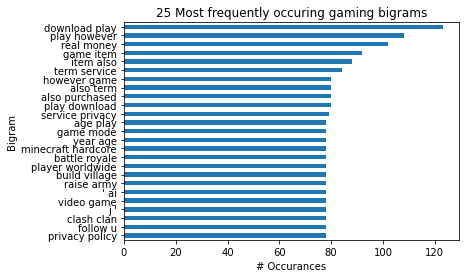

In [37]:
Gaming = ' '.join(df[df.categoryId == 'Gaming'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Gaming, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending = True).plot.barh(), 
plt.title('25 Most frequently occuring gaming bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

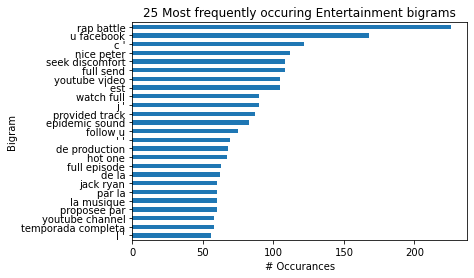

In [38]:
Ruby = ' '.join(df[df.categoryId == 'Entertainment'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending = True).plot.barh(),

plt.title('25 Most frequently occuring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Wordcloud

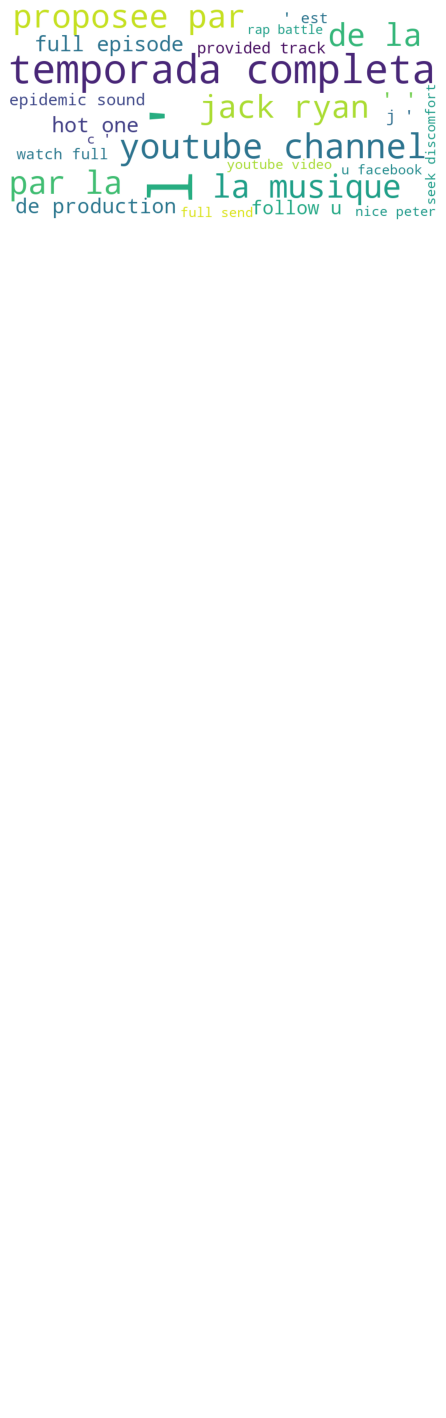

In [39]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

axs = [plt.axes([0, 0, 1, 1]), plt.axes([0, 1, 1, 1]), plt.axes([0, 2, 1, 1])
      , plt.axes([0, 3, 1, 1]), plt.axes([0, 4, 1, 1])]

axs[4].imshow(img)

for ax in axs: ax.axis('off')
plt.show()

In [40]:
df.view_count = df.view_count.astype(float)
df.view_count

0       1098919.0
1       1670293.0
2        841292.0
3      30998614.0
4        343269.0
          ...    
155      929198.0
156      459905.0
157      197112.0
158      395480.0
159     5853663.0
Name: view_count, Length: 9536, dtype: float64

<AxesSubplot:ylabel='Frequency'>

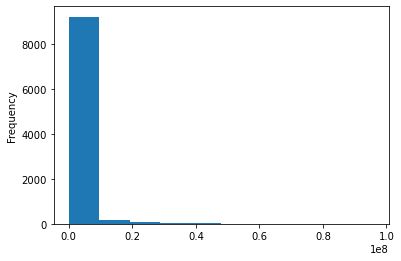

In [41]:
df.view_count.plot.hist()

## Modeling - Take 1

In [42]:

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")


In [43]:
df.lemmatized

0      5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...
1      thing jin bts ' live without limited edition m...
2                                       056 343 647 1200
3      jin ' astronaut ' official mvcredits director ...
4      3 3 businesssandboxsquarenet httpswwwtwitchtvs...
                             ...                        
155    cash telugushow etvwin sumakanakala santhoshsh...
156    indulge vilvahs collection organic skin hair c...
157    download india ' 1 audio book platform httpsku...
158    follow instagram httpswwwinstagramcomjsfilmsin...
159    vlog 261gaurav ' instagram httpswwwinstagramco...
Name: lemmatized, Length: 9536, dtype: object

In [44]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.lemmatized)
tfidfs

<9536x47250 sparse matrix of type '<class 'numpy.float64'>'
	with 539637 stored elements in Compressed Sparse Row format>

In [45]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

,00,000,0000,000000,00000011,000000inicio,000013,0000ho,000415,000430inicio,...,zwiebel12,zwiebelsalz,zwischen,zwischendurch,zwischenmenschliche,zwischenzeit,zxcv34276gmailcom,zyada,zyzx,zzzzziiiizzzzzme
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df.lemmatized.str.contains('zxingcppzxingcpphttpsgithubcomzxingcppzxingcpp').sum()

0

In [47]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.top_25

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [48]:
X_test.shape

(1908, 47250)

In [49]:
X_validate.shape

(1907, 47250)

In [50]:
X_train.shape

(5721, 47250)

In [51]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')

print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 89.18%
---
actual           0    1
predicted_lm           
0             4973  606
1               13  129
---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4986
           1       0.91      0.18      0.29       735

    accuracy                           0.89      5721
   macro avg       0.90      0.59      0.62      5721
weighted avg       0.89      0.89      0.86      5721



In [52]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')

print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 88.20%
---
actual           0    1
predicted_lm           
0             1656  219
1                6   26
---
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1662
           1       0.81      0.11      0.19       245

    accuracy                           0.88      1907
   macro avg       0.85      0.55      0.56      1907
weighted avg       0.87      0.88      0.84      1907



In [53]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

MultinomialNB()

In [54]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

In [55]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('---')

print(pd.crosstab(train.predicted_MNBclf, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_MNBclf))

Accuracy: 90.25%
---
actual               0    1
predicted_MNBclf           
0                 4973  545
1                   13  190
---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4986
           1       0.94      0.26      0.41       735

    accuracy                           0.90      5721
   macro avg       0.92      0.63      0.68      5721
weighted avg       0.91      0.90      0.88      5721



In [56]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('---')

print(pd.crosstab(validate.predicted_MNBclf, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_MNBclf))

Accuracy: 88.31%
---
actual               0    1
predicted_MNBclf           
0                 1657  218
1                    5   27
---
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1662
           1       0.84      0.11      0.19       245

    accuracy                           0.88      1907
   macro avg       0.86      0.55      0.57      1907
weighted avg       0.88      0.88      0.84      1907



In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,00,000,0000,000000,00000011,000000inicio,000013,0000ho,000415,000430inicio,...,zwiebel12,zwiebelsalz,zwischen,zwischendurch,zwischenmenschliche,zwischenzeit,zxcv34276gmailcom,zyada,zyzx,zzzzziiiizzzzzme
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')

print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 95.09%
---
actual           0    1
predicted_lm           
0             4919  214
1               67  521
---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4986
           1       0.89      0.71      0.79       735

    accuracy                           0.95      5721
   macro avg       0.92      0.85      0.88      5721
weighted avg       0.95      0.95      0.95      5721



In [60]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')

print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 92.13%
---
actual           0    1
predicted_lm           
0             1620  108
1               42  137
---
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1662
           1       0.77      0.56      0.65       245

    accuracy                           0.92      1907
   macro avg       0.85      0.77      0.80      1907
weighted avg       0.92      0.92      0.92      1907



In [61]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df.lemmatized)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,00,00 1028321,00 16,00 wenige,000,000 0135,000 042,000 108,000 125,000 15minute,...,zwischenzeit,zwischenzeit fur,zxcv34276gmailcom,zxcv34276gmailcom hxxax,zyada,zyada der,zyzx,zyzx httpswwwtwitchtvzyzxbluto2u2,zzzzziiiizzzzzme,zzzzziiiizzzzzme suivre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [63]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')

print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 95.33%
---
actual           0    1
predicted_lm           
0             4921  202
1               65  533
---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4986
           1       0.89      0.73      0.80       735

    accuracy                           0.95      5721
   macro avg       0.93      0.86      0.89      5721
weighted avg       0.95      0.95      0.95      5721



In [64]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')

print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 92.50%
---
actual           0    1
predicted_lm           
0             1625  106
1               37  139
---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1662
           1       0.79      0.57      0.66       245

    accuracy                           0.93      1907
   macro avg       0.86      0.77      0.81      1907
weighted avg       0.92      0.93      0.92      1907



## Modeling - Take 2

## Sketchy work

In [65]:
#model imports

from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


In [66]:
def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [67]:
train, validate, test = my_train_test_split(df, 'top_25')

In [68]:
train.shape,validate.shape,test.shape

((5721, 32), (1907, 32), (1908, 32))

# Modeling & Evaluate
## Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
#Write function to scale data for zillow data
def scale_data(train, validate, test, features_to_scale):
    """Scales the 3 data splits using MinMax Scaler. 
    Takes in train, validate, and test data splits as well as a list of the features to scale. 
    Returns dataframe with scaled counterparts on as columns"""
    
    
    # Make the thing to train data only
    scaler = MinMaxScaler()
    scaler.fit(train[features_to_scale])
    
    # Fit the thing with new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Apply the scaled data to the original unscaled data
    #train_scaled = pd.get_dummies(train_scaled)
    #validate_scaled = pd.get_dummies(validate_scaled)
    #test_scaled = pd.get_dummies(test_scaled)
    
    
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1)

    return train_scaled, validate_scaled, test_scaled

In [71]:
features_to_scale = ['age',"num_of_tags","duration", "rank","num_of_tags","engagement","sponsored"]
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale)

In [72]:
train_scaled.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'description', 'duration', 'captions', 'region', 'rank', 'top_25',
       'age', 'engagement', 'sponsored', 'num_of_tags', 'word_bank',
       'cleaned_tags', 'cleaned_desc', 'title_in_description', 'title_in_tags',
       'pct_tags_in_description', 'clean', 'stemmed', 'lemmatized',
       'age_scaled', 'num_of_tags_scaled', 'duration_scaled', 'rank_scaled',
       'num_of_tags_scaled', 'engagement_scaled', 'sponsored_scaled'],
      dtype='object')

In [73]:
#X will be features
#y will be our target variable
#these features have high correlation to top_25

scaled_features = ['age_scaled', 'num_of_tags_scaled','duration_scaled', 'rank_scaled', 'num_of_tags_scaled',
       'engagement_scaled', 'sponsored_scaled']
X_train = train_scaled[scaled_features]
y_train = train_scaled.top_25
X_validate = validate_scaled[scaled_features]
y_validate = validate_scaled.top_25
X_test = test_scaled[scaled_features]
y_test= test_scaled.top_25

## Baseline

In [74]:
#baseline prediction:baseline is the mode value
y_train.value_counts()

0    4986
1     735
Name: top_25, dtype: int64

In [75]:
baseline_accuracy = (y_train == 0).mean()
print('Top_25 baseline accuracy is:', baseline_accuracy)

Top_25 baseline accuracy is: 0.8715259570005244


In [76]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## Option 1

## Decision Tree Classifier

In [77]:
#loop the model with changing max depth only
model_scores = []
for i in range(1,10):
    model = DecisionTreeClassifier(max_depth=i, random_state =123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"i":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,i,accuracy_train,accuracy_validate,difference
0,1,1.0,1.0,0.0
1,2,1.0,1.0,0.0
2,3,1.0,1.0,0.0
3,4,1.0,1.0,0.0
4,5,1.0,1.0,0.0
5,6,1.0,1.0,0.0
6,7,1.0,1.0,0.0
7,8,1.0,1.0,0.0
8,9,1.0,1.0,0.0


## Random Forest

In [78]:
#model with tuning min sample leaf only
model_scores = []

for i in range(1,10):

    model = RandomForestClassifier(min_samples_leaf= i,random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"min_sample_leaf":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,min_sample_leaf,accuracy_train,accuracy_validate,difference
0,1,1.0,1.0,0.0
1,2,1.0,1.0,0.0
2,3,1.0,1.0,0.0
3,4,1.0,1.0,0.0
4,5,1.0,1.0,0.0
5,6,1.0,1.0,0.0
6,7,1.0,1.0,0.0
7,8,1.0,1.0,0.0
8,9,1.0,1.0,0.0


## KNN

In [79]:
#For lopp for KNN 
empty_model = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors = k, weights = "uniform")
    model=model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"k":k, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    
    
    empty_model.append(output)

df = pd.DataFrame(empty_model)
df

,k,accuracy_train,accuracy_validate,difference
0,1,1.000000,0.991085,0.008915
1,2,0.994931,0.986890,0.008041
2,3,0.994581,0.983744,0.010837
3,4,0.991785,0.984268,0.007516
4,5,0.991610,0.983220,0.008390
5,6,0.990037,0.979549,0.010488
6,7,0.989687,0.981647,0.008041
7,8,0.987764,0.980598,0.007167
8,9,0.989163,0.982695,0.006467
9,10,0.988813,0.982695,0.006118


## Logistic Regression

In [80]:
model = LogisticRegression(C = .1, random_state=123)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_train)
accuracy_train = model.score(X_train,y_train)
accuracy_validate = model.score(X_validate,y_validate)
difference = accuracy_train-accuracy_validate
output = { "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    
output  

{'accuracy_train': 0.9393462681349415,
 'accuracy_validate': 0.9286837965390666,
 'difference': 0.010662471595874856}

## Option 2

## Build a Model to Test Multiple Types of Models as MVPs
### Create a model.
### Fit to train.
### Score model.

In [81]:
def score_models(X_train, y_train, X_validate, y_validate):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = dt_model1, rf_model, knn1_model.
    '''
    dt_model1 = DecisionTreeClassifier(max_depth = 8, random_state = 123)
    rf_model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
    knn1_model = KNeighborsClassifier()
    models = [dt_model1, rf_model, knn1_model]
    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_validate = y_validate
        predicted_validate = model.predict(X_validate)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('validate score: ')
        print(classification_report(actual_validate, predicted_validate))
        print('________________________')
        print('')
    return dt_model1, rf_model, knn1_model


In [82]:
dt_model1, rf_model, knn1_model = score_models(X_train, y_train, X_validate, y_validate)

DecisionTreeClassifier(max_depth=8, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4986
           1       1.00      1.00      1.00       735

    accuracy                           1.00      5721
   macro avg       1.00      1.00      1.00      5721
weighted avg       1.00      1.00      1.00      5721

validate score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00       245

    accuracy                           1.00      1907
   macro avg       1.00      1.00      1.00      1907
weighted avg       1.00      1.00      1.00      1907

________________________

RandomForestClassifier(max_depth=10)

train score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4986
           1       1.00      1.00      1.00       735

    accuracy      

## Option 3

## Decision Tree

In [83]:
# make the thing
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 123)
# fit the thing
clf.fit(X_train, y_train)
# use the thing
pred = clf.predict(X_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_validate = clf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))
cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
#plt.show()

Accuracy of train: 100.00%
Accuracy of validate: 100.00%


## Random Forest

In [84]:
# make the thing 
rf = RandomForestClassifier(min_samples_leaf = 6, max_depth = 3)
# fit the thing
rf.fit(X_train, y_train)
# use the thing
pred = rf.predict(X_train)
accuracy_train = rf.score(X_train, y_train)
accuracy_validate = rf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))

cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
#plt.show()

Accuracy of train: 100.00%
Accuracy of validate: 100.00%


## Logistic Regression

In [85]:
# make the thing 
logit = LogisticRegression() 
# fit the thing
logit.fit(X_train, y_train)
# use the thing
pred = logit.predict(X_train)

accuracy_train = logit.score(X_train, y_train)
accuracy_validate = logit.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))


cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
#plt.show()

Accuracy of train: 99.30%
Accuracy of validate: 98.90%


In [86]:
### just testing

## TEST Models

In [87]:
# Decision Tree model has the best accuracy of 80.43%, let's do a test on it
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on test set: 1.00
